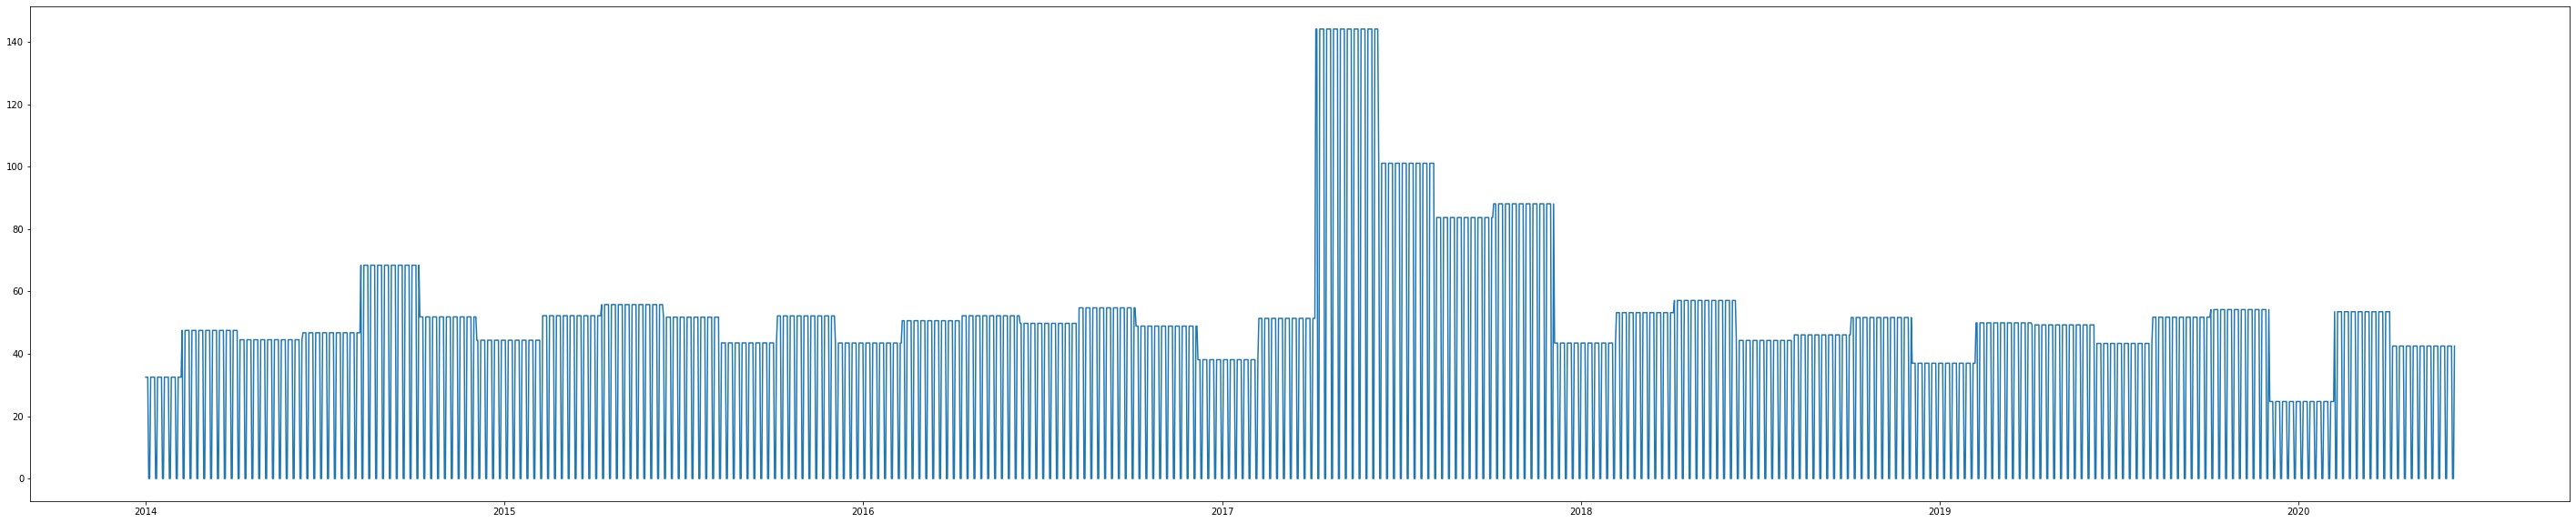

In [3]:
import pandas as pd
import numpy as np
from dateutil.rrule import rrule, MONTHLY

from datetime import datetime
from matplotlib import pyplot

#Filtrado de los datos que nos interesan.
Datos = pd.read_csv('consumosUPMcorrecto.csv', delimiter=',', header=0, )
Datos = Datos[Datos.Recurso=="Agua"]

Datos = Datos[Datos.NombreCentro=="ETSI Industriales"]

Datos.pop('Campus')
Datos.pop('Dirección')
Datos.pop('Centro')
Datos.pop('TipoCentro')
Datos.pop('FechaEmisionFactura')
Datos.pop('ConsumoP1')
Datos.pop('ConsumoP2')
Datos.pop('ConsumoP3')
Datos.pop('ConsumoP4')
Datos.pop('ConsumoP5')
Datos.pop('ConsumoP6')
Datos.pop('AñoFinLectura')
Datos.FechaInicioLectura = pd.to_datetime(Datos.FechaInicioLectura)
Datos.FechaFinLectura = pd.to_datetime(Datos.FechaFinLectura)
#creación CSV diario
#Dia de la semana (L-D)
#Día (fecha)
#Consumo/día
data={'Dia_semana':['L'],'Dia':['0000-00-00'],'ConsumoDia':[0]}
df_data = pd.DataFrame(data)
#print(df_data)
#creamos dataframe desde 01/01/2014 hasta 31/12/2020
from datetime import timedelta, date
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
#FECHA INICIO Y FIN DEL BUCLE
start_date = date(2014, 1, 1)
end_date = date(2020, 6, 9)
for single_date in daterange(start_date, end_date):
    dia_sem=single_date.strftime("%a")
    intervalo_inf=Datos[Datos.FechaInicioLectura <= pd.to_datetime(single_date)]
    intervalo=intervalo_inf[intervalo_inf.FechaFinLectura > pd.to_datetime(single_date)]
    Consumo_intervalo=pd.to_numeric(intervalo["ConsumoTotal"]).sum()
    if Consumo_intervalo > 0:
        fecha_fin=intervalo['FechaFinLectura'].iloc[0]
        fecha_ini=intervalo['FechaInicioLectura'].iloc[0]
        Numero_dias_validos_intervalo = np.busday_count(fecha_ini.date(), fecha_fin.date() + timedelta(days=1))
        Consumo_dia = Consumo_intervalo / Numero_dias_validos_intervalo
        if np.is_busday(single_date) == True:
            new_row={'Dia_semana':dia_sem,'Dia':str(single_date),'ConsumoDia':Consumo_dia}
            df_data=df_data.append(new_row,ignore_index=True)
            single_date= single_date+ timedelta(days=1)
        else:
            new_row = {'Dia_semana': dia_sem, 'Dia': str(single_date), 'ConsumoDia': 0}
            df_data = df_data.append(new_row, ignore_index=True)
            single_date= single_date+ timedelta(days=1)
    else:
        print ("ERROR")

df_data=df_data[1:]
# df_data.to_csv('diario.csv',index=False)

df_data=df_data.set_index('Dia')
df_data.index = pd.to_datetime(df_data.index)

pyplot.figure(figsize=(50,10))
pyplot.plot(df_data['ConsumoDia'])



In [4]:

df_mensual = df_data.resample('MS').sum()
print (df_mensual.head(10))
df_mensual= df_mensual.reset_index()
print (df_mensual.head(10))
df_mensual.to_csv('Industriales.csv',index=False)

print('fin')

             ConsumoDia
Dia                    
2014-01-01   747.979167
2014-02-01   890.083333
2014-03-01   997.500000
2014-04-01   991.191489
2014-05-01   979.234043
2014-06-01   968.313830
2014-07-01  1075.250000
2014-08-01  1328.447674
2014-09-01  1505.209302
2014-10-01  1258.581395
         Dia   ConsumoDia
0 2014-01-01   747.979167
1 2014-02-01   890.083333
2 2014-03-01   997.500000
3 2014-04-01   991.191489
4 2014-05-01   979.234043
5 2014-06-01   968.313830
6 2014-07-01  1075.250000
7 2014-08-01  1328.447674
8 2014-09-01  1505.209302
9 2014-10-01  1258.581395
fin


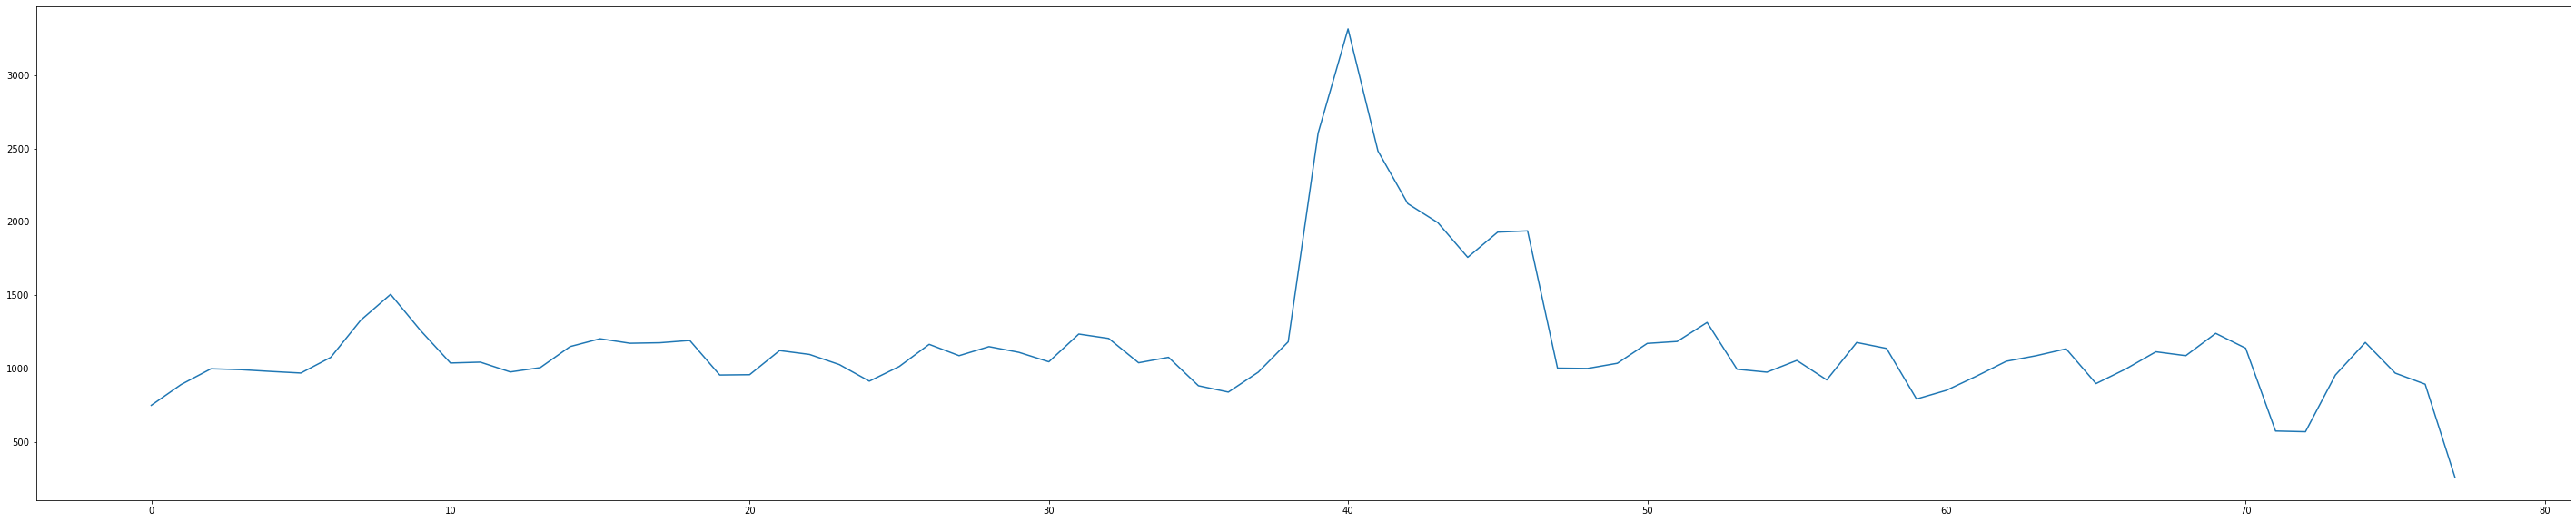

In [5]:
pyplot.figure(figsize=(50,10))
pyplot.plot(df_mensual['ConsumoDia'])